In [1]:
import json
import os 
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as img

In [2]:
def get_results():
    global filenames
    filenames = [f for f in os.listdir(os.getcwd()+'./results/') if not f.endswith('checkpoints')]
    for filename in filenames:
        with open('./results/'+ filename,'r') as f: yield filename, json.load(f)

In [3]:
def mk_dataframe(results):
    print("Model: ", results[0].strip('.json'))
    return pd.DataFrame.from_dict(results[1], orient='index')

In [4]:
def show_plots(metric, idx):
    folder = 'losses/' if metric == 'loss' else 'accs/'
    filename = './plots/' + folder + os.listdir(os.getcwd() + './plots/' + folder)[idx]  
    print("Model: ", re.sub(r'./plots/' + folder, '', filename.replace('.png', '')))
    image = img.imread(filename)
    plt.clf()
    plt.figure(dpi=100)
    plt.imshow(image)
    plt.show()

In [5]:
results = get_results()

In [6]:
mk_dataframe(next(iter(results)))

Model:  100d_bert_avg_pos_types_single_kg


,max,agg,sel,where
dev,0.547912,0.900945,0.874507,0.676636
train,0.967593,0.983448,0.999267,0.974350


In [7]:
mk_dataframe(next(iter(results)))

Model:  100d_bert_avg_types_single_kg


,max,agg,sel,where
dev,0.538940,0.898433,0.864457,0.679387
train,0.958656,0.988900,0.998856,0.970382


In [8]:
mk_dataframe(next(iter(results)))

Model:  100d_bert_max-pool_pos_types_single_kg


,max,agg,sel,where
dev,0.543486,0.899031,0.869721,0.674841
train,0.954759,0.983716,0.998731,0.971740


In [9]:
mk_dataframe(next(iter(results)))

Model:  100d_bert_max-pool_types_single_kg


,max,agg,sel,where
dev,0.545400,0.898672,0.868286,0.675440
train,0.958137,0.987917,0.998892,0.970399


In [10]:
mk_dataframe(next(iter(results)))

Model:  100d_pos_types_single_kg


,max,agg,sel,where
dev,0.644893,0.899287,0.920665,0.775059
train,0.964900,0.979718,0.998651,0.978759


In [11]:
mk_dataframe(next(iter(results)))

Model:  100d_types_single_kg


,max,agg,sel,where
dev,0.655701,0.900831,0.930998,0.779572
train,0.973010,0.994818,0.998722,0.979150


Model:  100d_bert_avg_pos_types_single_kg


<Figure size 432x288 with 0 Axes>

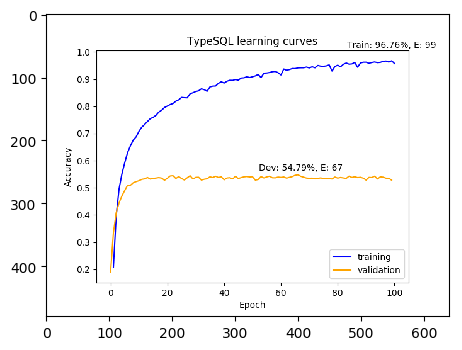

Model:  100d_bert_avg_types_single_kg


<Figure size 432x288 with 0 Axes>

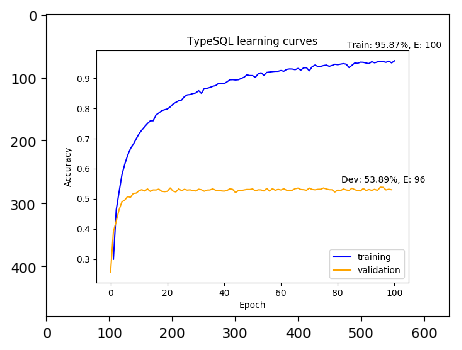

Model:  100d_bert_max-pool_pos_types_single_kg


<Figure size 432x288 with 0 Axes>

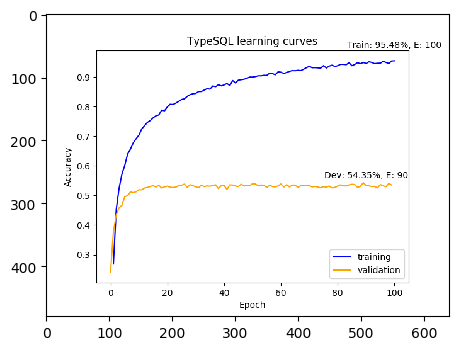

Model:  100d_bert_max-pool_types_single_kg


<Figure size 432x288 with 0 Axes>

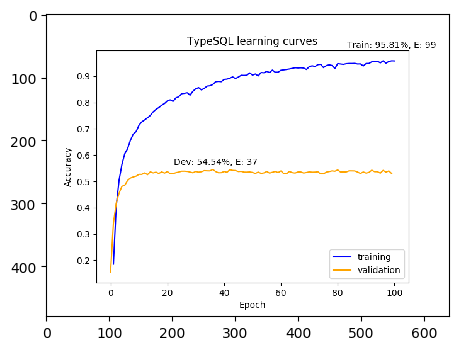

Model:  100d_pos_types_single_kg


<Figure size 432x288 with 0 Axes>

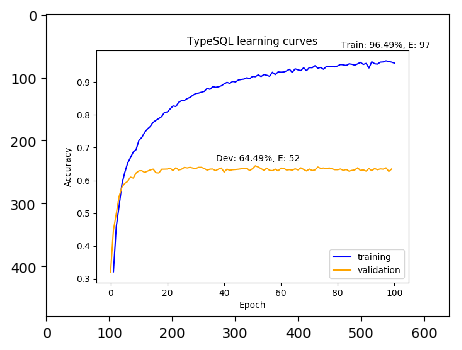

Model:  100d_types_single_kg


<Figure size 432x288 with 0 Axes>

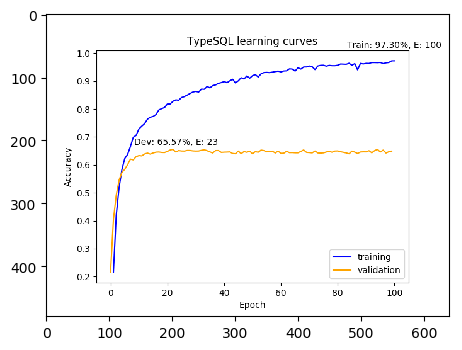

In [12]:
for i in range(len(filenames)):
    show_plots('acc', i)

In [13]:
#for i in range(len(filenames)):
#    show_plots('loss', i)